In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 3]
import yfinance as yf

In [19]:
def barPlotPctChangedf(symbol, interval, period):
    df= yf.download(symbol,interval=interval,rounding=True, period=period,auto_adjust=True)
    pct_change = df.Close.pct_change(periods=1)
    close_ma30 = pd.concat([df.Close, pct_change], axis=1).dropna()
    close_ma30.columns = ['Close', 'pct_change']
    close_ma30['pct_change'].plot(kind='bar')
    plt.show()

[*********************100%***********************]  1 of 1 completed


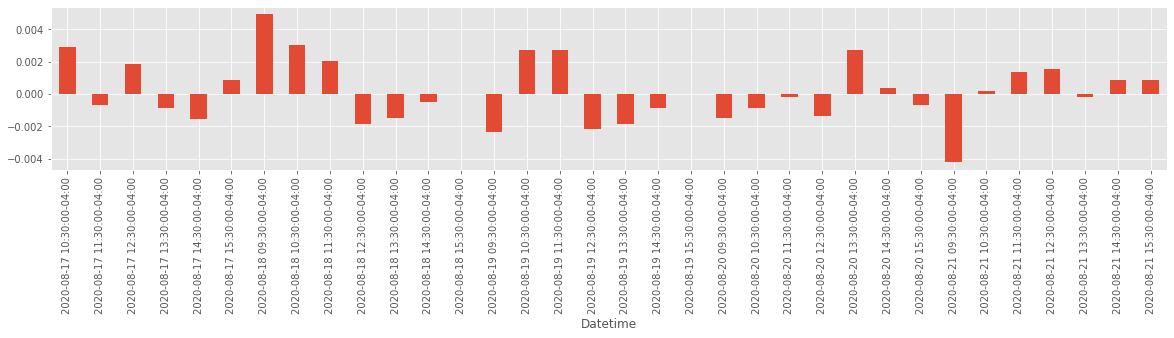

[*********************100%***********************]  1 of 1 completed


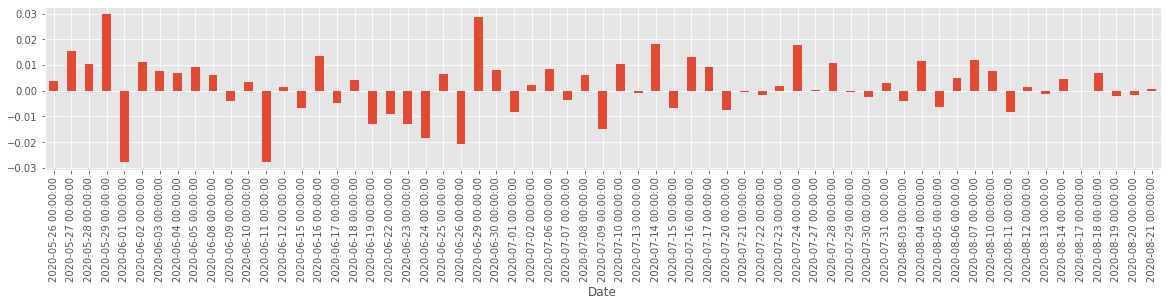

[*********************100%***********************]  1 of 1 completed


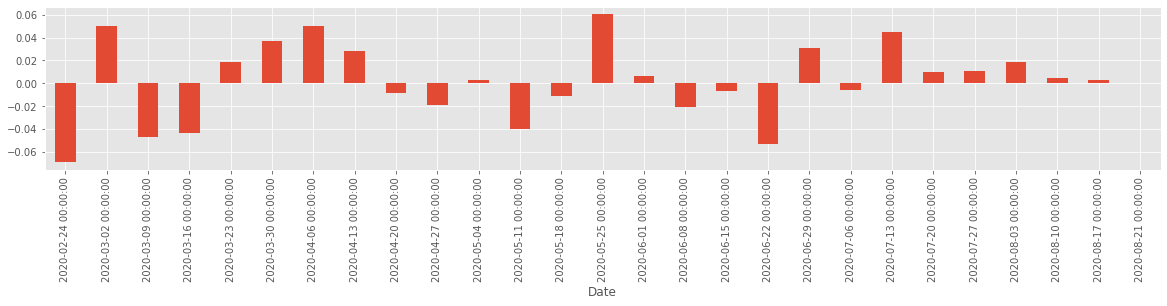

In [28]:
symbol = 'VZ'
barPlotPctChangedf(symbol,'60m','5d')
barPlotPctChangedf(symbol,'1d','3mo')
barPlotPctChangedf(symbol,'1wk','6mo')

In [5]:
symbol = 'TWTR'
#symbols = ['AAPL','AMZN','MSFT']
df = yf.download(symbol,interval='1wk',rounding=True, period='1mo',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


Date
2020-07-06         NaN
2020-07-13    0.011582
2020-07-20    0.048311
2020-07-27   -0.030368
2020-08-03    0.020330
2020-08-07    0.000000
Name: Close, dtype: float64

In [7]:
pct_change = df.Close.pct_change(periods=1)
close_ma30 = pd.concat([df.Close, pct_change], axis=1).dropna()
close_ma30.columns = ['Close', 'pct_change']
close_ma30

,Close,pct_change
Date,,
2020-07-13,35.81,0.011582
2020-07-20,37.54,0.048311
2020-07-27,36.40,-0.030368
2020-08-03,37.14,0.020330
2020-08-07,37.14,0.000000


<pre>   interval : 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
   period :   1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max   or start and end
</pre>

In [11]:
def getPctChanged(symbol, interval, period):
    df= yf.download(symbol,interval=interval,rounding=True, period=period,auto_adjust=True)
    pct_change = df.Close.pct_change(periods=1)
    close_ma30 = pd.concat([df.Close, pct_change], axis=1).dropna()
    close_ma30.columns = ['Close', 'pct_change']
    return close_ma30

In [185]:
df= yf.download(symbol,interval='60m',rounding=True, period='5d',auto_adjust=True)
# pct_change = df.Close.pct_change(periods=1)
# df = pd.concat([df.Close, pct_change], axis=1).dropna()
# df.columns = ['Close', 'pct_change']
#df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M')
#df1.index = df1.index.strftime('%Y-%m-%d')
#df.index

#df['pct_change']
#pd.to_datetime(df.index, format = '%Y-%m-%d')
df.index = df.index.strftime('%Y-%m-%d %H%:%M')
df.index

[*********************100%***********************]  1 of 1 completed


Index(['2020-07-31 09:30', '2020-07-31 10:30', '2020-07-31 11:30',
       '2020-07-31 12:30', '2020-07-31 13:30', '2020-07-31 14:30',
       '2020-07-31 15:30', '2020-08-06 09:30', '2020-08-06 10:30',
       '2020-08-06 11:30', '2020-08-06 12:30', '2020-08-06 13:30',
       '2020-08-06 14:30', '2020-08-06 15:30'],
      dtype='object', name='Datetime')

In [135]:
df = getPctChanged(symbol,'60m','1d')
df

[*********************100%***********************]  1 of 1 completed


,Close,pct_change
Datetime,,
2020-08-06 10:30:00-04:00,0.9026,-0.019233
2020-08-06 11:30:00-04:00,0.9024,-0.000222
2020-08-06 12:30:00-04:00,0.8970,-0.005984
2020-08-06 13:30:00-04:00,0.8919,-0.005686
2020-08-06 14:30:00-04:00,0.8907,-0.001345
2020-08-06 15:30:00-04:00,0.8805,-0.011452


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


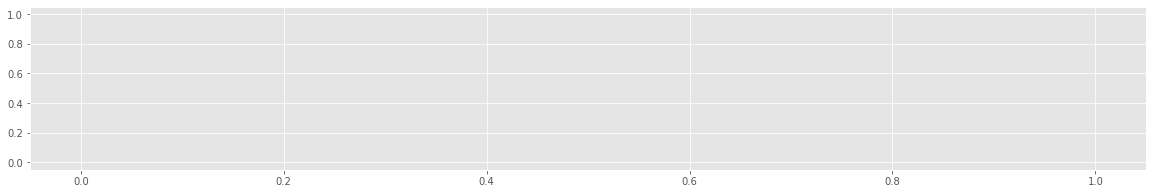

In [116]:
fig, ax = plt.subplots()
df = getPctChanged(symbol,'90m','1mo')
#ax = df['pct_change'].plot(kind='bar')
ax.plot(data=df['pct_change'] ,kind='bar')
#ax.set_title('A single plot')

#fig, axs = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
df2 = getPctChanged(symbol,'1d','3mo')
#df2['pct_change'].plot(ax=ax,kind='bar')

axs[1].plot(data=df2['pct_change'] ,kind='bar')

#fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
#df = getPctChanged(symbol,'1wk','6mo')
#ax1.plot(data=df,kind='bar')
plt.show()

[*********************100%***********************]  1 of 1 completed


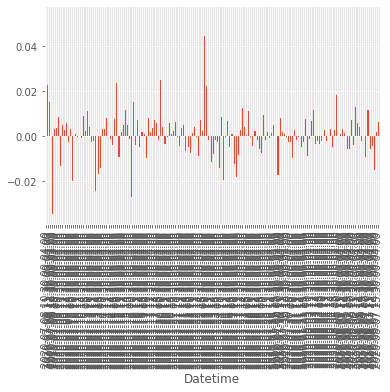

In [12]:
symbol = 'TWTR'
df = getPctChanged(symbol,'60m','1mo')
df['pct_change'].plot(kind='bar')
plt.show()

 Signature:
yf.download(
    tickers,
    start=None,
    end=None,
    actions=False,
    threads=True,
    group_by='column',
    auto_adjust=False,
    back_adjust=False,
    progress=True,
    period='max',
    interval='1d',
    prepost=False,
    proxy=None,
    rounding=False,
    **kwargs,
)
Docstring:
Download yahoo tickers
:Parameters:
    tickers : str, list
        List of tickers to download
    period : str
        Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        Either Use period parameter or use start and end
    interval : str
        Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        Intraday data cannot extend last 60 days
    start: str
        Download start date string (YYYY-MM-DD) or _datetime.
        Default is 1900-01-01
    end: str
        Download end date string (YYYY-MM-DD) or _datetime.
        Default is now
    group_by : str
        Group by 'ticker' or 'column' (default)
    prepost : bool
        Include Pre and Post market data in results?
        Default is False
    auto_adjust: bool
        Adjust all OHLC automatically? Default is False
    actions: bool
        Download dividend + stock splits data. Default is False
    threads: bool / int
        How many threads to use for mass downloading. Default is True
    proxy: str
        Optional. Proxy server URL scheme. Default is None
    rounding: bool
        Optional. Round values to 2 decimal places?
File:      /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/yfinance/multi.py
Type:      function

In [ ]:

df.Close.rolling(1).mean()


[*********************100%***********************]  3 of 3 completed


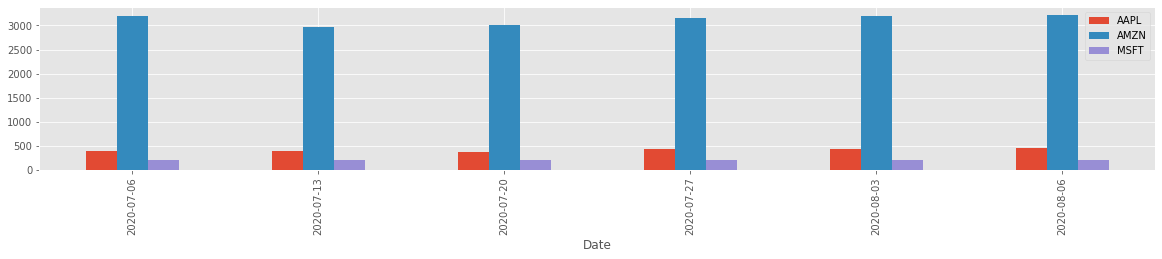

In [187]:
symbol = 'AAPL'
symbols = ['AAPL','AMZN','MSFT']
df = yf.download(symbols,interval='1wk',rounding=True, period='1mo',auto_adjust=True)
df.index = df.index.strftime('%Y-%m-%d')
x = df['Close']
x.plot(kind='bar')


In [34]:
df['AAPL']
df.columns

Index(['AAPL', 'AMZN', 'MSFT'], dtype='object')

[*********************100%***********************]  1 of 1 completed


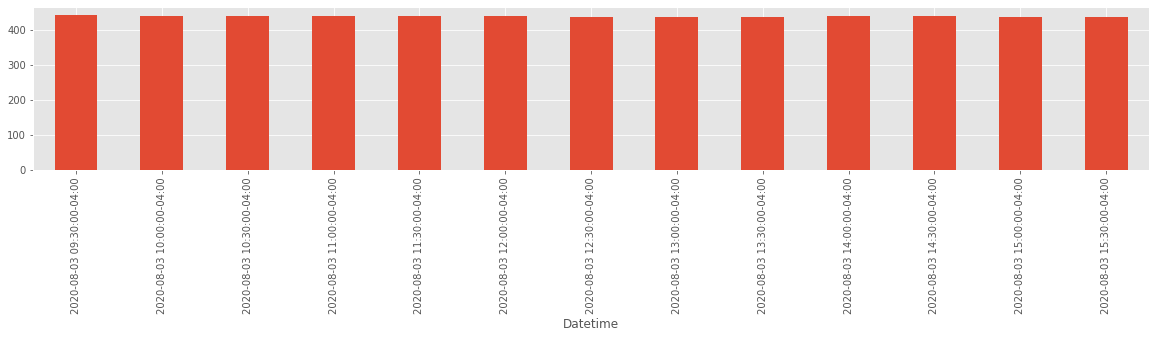

In [172]:

symbol = 'AAPL'
start_date = '2020-08-03'
end_date = '2020-08-04'
df = yf.download(symbol, start=start_date, end=end_date, interval='30m')
df
#x = df.groupby('state_name')['deaths'].mean().sort_values()
x = df['Close']
x.plot(kind='bar')

In [168]:
df.index

DatetimeIndex(['2020-08-03 09:31:00-04:00', '2020-08-03 09:32:00-04:00',
               '2020-08-03 09:33:00-04:00', '2020-08-03 09:34:00-04:00',
               '2020-08-03 09:35:00-04:00', '2020-08-03 09:36:00-04:00',
               '2020-08-03 09:37:00-04:00', '2020-08-03 09:38:00-04:00',
               '2020-08-03 09:39:00-04:00', '2020-08-03 09:40:00-04:00',
               ...
               '2020-08-03 15:50:00-04:00', '2020-08-03 15:51:00-04:00',
               '2020-08-03 15:52:00-04:00', '2020-08-03 15:53:00-04:00',
               '2020-08-03 15:54:00-04:00', '2020-08-03 15:55:00-04:00',
               '2020-08-03 15:56:00-04:00', '2020-08-03 15:57:00-04:00',
               '2020-08-03 15:58:00-04:00', '2020-08-03 15:59:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=389, freq=None)

In [5]:
import pandas as pd
def get_yahoo_data(symbol, start_date, end_date):
    """Returns pricing data for a YAHOO stock symbol.
    Parameters
    ----------
    symbol : str
        Symbol of the stock in the Yahoo. You can refer to this link:
        https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq.
    start_date : str
        Starting date (YYYY-MM-DD) of the period that you want to get data on
    end_date : str
        Ending date (YYYY-MM-DD) of the period you want to get data on
    Returns
    -------
    pandas.DataFrame
        Stock data (in OHLCAV format) for the specified company and date range
    """
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df.reset_index()
    rename_dict = {
        "Date": "dt",
        "Open": "open",
        "High": "high",
        "Low": "low",
        "Close": "close",
        "Adj Close": "adj_close",
        "Volume": "volume",
    }
    rename_list = ["dt", "open", "high", "low", "close", "adj_close", "volume"]
    df = df.rename(columns=rename_dict)[rename_list].drop_duplicates()
    df["dt"] = pd.to_datetime(df.dt)
    return df.set_index("dt")

df = get_yahoo_data(symbol,start_date,end_date)
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
dt,,,,,,
2020-01-02,296.239990,300.600006,295.190002,300.350006,298.829956,33870100
2020-01-03,297.149994,300.579987,296.500000,297.429993,295.924713,36580700
2020-01-06,293.790009,299.959991,292.750000,299.799988,298.282715,29596800
2020-01-07,299.839996,300.899994,297.480011,298.390015,296.879883,27218000
2020-01-08,297.160004,304.440002,297.160004,303.190002,301.655548,33019800
...,...,...,...,...,...,...
2020-07-27,374.839996,379.619995,373.920013,379.239990,379.239990,30303500
2020-07-28,377.470001,378.200012,372.989990,373.010010,373.010010,25906400
2020-07-29,375.000000,380.920013,374.850006,380.160004,380.160004,22582300


In [1]:
from fastquant import get_stock_data, backtest
df = get_stock_data('AAPL', '2020-01-01', '2020-08-01')
df

[*********************100%***********************]  1 of 1 completed


,close
dt,
2020-01-02,300.350006
2020-01-03,297.429993
2020-01-06,299.799988
2020-01-07,298.390015
2020-01-08,303.190002
...,...
2020-07-27,379.239990
2020-07-28,373.010010
2020-07-29,380.160004
